In [249]:
import os 
import zipfile
import datetime

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('whitegrid')

In [11]:
PATH = os.getcwd()
datasetPATH = PATH + '/dataset/archive.zip'

Data description:

- Highest Charting Position: The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Number of Times Charted: The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Week of Highest Charting: The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song Name: Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Song iD: The song ID provided by Spotify (unique to each song).
- Streams: Approximate number of streams the song has.
- Artist: The main artist/ artists involved in making the song.
- Artist Followers: The number of followers the main artist has on Spotify.
- Genre: The genres the song belongs to.
- Release Date: The initial date that the song was released.
- Weeks Charted: The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.
- Popularity:The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Chord: The main chord of the song instrumental.

In [142]:
dataZIPfile = zipfile.ZipFile(datasetPATH) 
data = pd.read_csv(dataZIPfile.open('spotify_dataset.csv'))
data = data.drop(['Index', 'Song ID'], axis=1)
data = data[data != ' '].dropna().reset_index(drop=True)

In [143]:
data.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Weeks Charted,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [144]:
data.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [145]:
data['Weeks Charted'] = data['Weeks Charted'].str.split('\n')
data['Streams'] = pd.to_numeric(data['Streams'].str.replace(",", ""))
#changing data to numeric
data.iloc[:, -11:-1] = data.iloc[:, -11:-1].apply(pd.to_numeric)
data.iloc[:, :2] = data.iloc[:, :2].apply(pd.to_numeric)
data['Artist Followers'] = pd.to_numeric(data['Artist Followers'])
data['Release Date'] = pd.to_datetime(data['Release Date'])

In [317]:
howManyChords = data['Chord'].value_counts(normalize=True) * 100

In [318]:
type(howManyChords)

pandas.core.series.Series

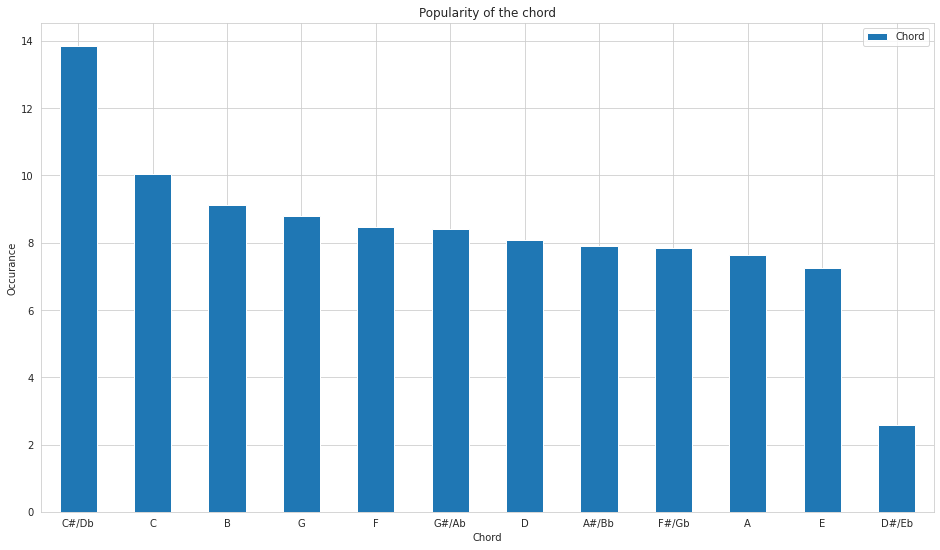

In [319]:
plt.title("Popularity of the chord")
howManyChords.plot.bar(figsize=(16, 9))
plt.xticks(rotation=0)
plt.legend(loc=0)
plt.xlabel("Chord")
plt.ylabel("Occurance");

In [155]:
mostPopularSongs = data.sort_values(by=['Streams'], ascending=False).reset_index(drop=True).head(100)

In [157]:
mostPopularSongs.drop(['Weeks Charted'], axis=1)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.5890,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.4780,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.6880,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.5910,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.8940,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,46,10,2021-07-23--2021-07-30,Heartbreak Anthem (with David Guetta & Little ...,10315460,Galantis,3120157,"['dance pop', 'edm', 'electro house', 'pop', '...",2021-05-20,89,0.595,0.784,-4.878,0.1020,0.2160,0.0608,124.111,183726,0.4790,C#/Db
96,1,51,2020-10-16--2020-10-23,Mood (feat. iann dior),10222056,24kGoldn,1274433,['cali rap'],2021-03-26,89,0.701,0.716,-3.671,0.0361,0.1740,0.3240,91.007,140533,0.7320,G
97,48,3,2021-07-23--2021-07-30,Entre Nosotros,10215216,"Tiago PZK, LIT killah",375865,['trap argentino'],2021-07-08,89,0.729,0.513,-6.345,0.0455,0.4940,0.1370,170.064,192353,0.7890,F
98,62,1,2020-01-17--2020-01-24,I Can See,10086930,Mac Miller,6189454,"['hip hop', 'pittsburgh rap', 'rap']",2020-01-17,60,0.699,0.503,-9.922,0.0882,0.3910,0.0996,114.860,220853,0.0546,F


In [315]:
mostPopularVocalist = mostPopularSongs['Artist'].value_counts().head(30)

<AxesSubplot:>

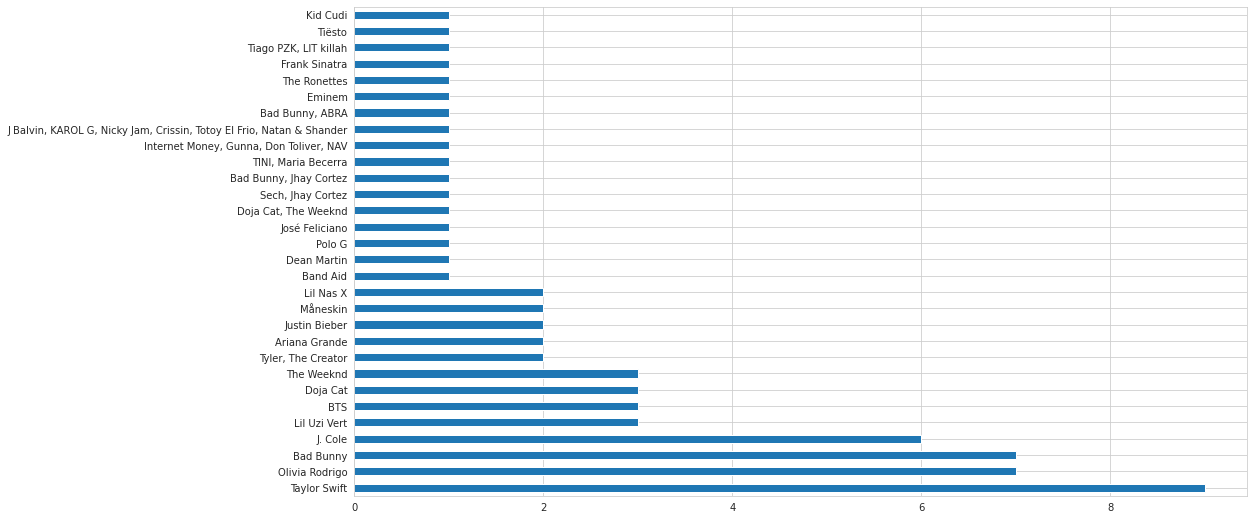

In [199]:
mostPopularVocalist.plot.barh(figsize=(16, 9))

In [320]:
howManyChords_PS = mostPopularSongs['Chord'].value_counts(normalize=True) * 100

In [321]:
chords = pd.DataFrame(data=[howManyChords_PS, howManyChords]).transpose()

In [322]:
chords = chords.set_axis(['Chords_PS', 'Chords_full_set'], axis=1, inplace=False)
chords_norm = chords.set_axis(['Chords_PS', 'Chords_full_set'], axis=1, inplace=False)

In [323]:
chords_norm['Chords_PS'] = (chords['Chords_PS']-chords['Chords_PS'].mean())/chords['Chords_PS'].std()
chords_norm['Chords_full_set'] = (chords['Chords_full_set']-chords['Chords_full_set'].mean())/chords['Chords_full_set'].std()

array([<AxesSubplot:title={'center':'Chords_PS'}>,
       <AxesSubplot:title={'center':'Chords_full_set'}>], dtype=object)

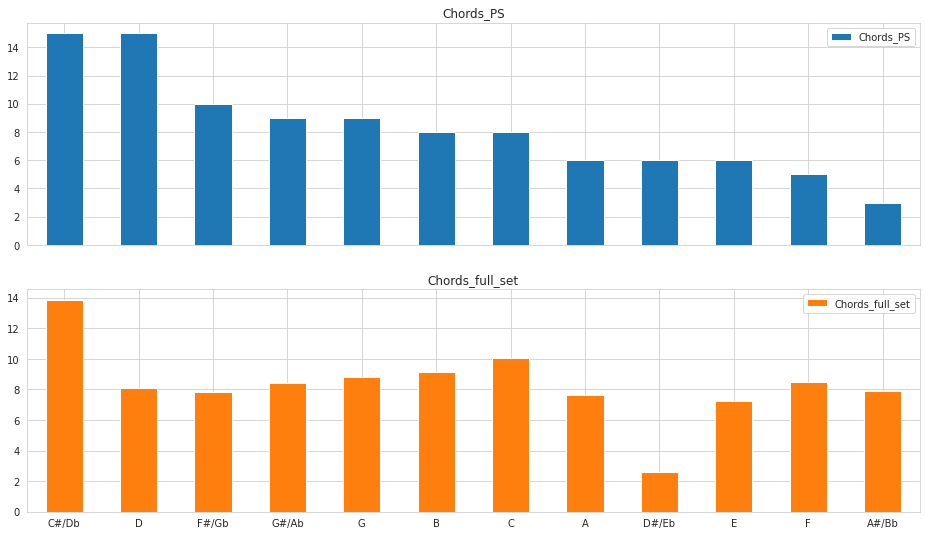

In [324]:
chords.plot.bar(rot=0, subplots=True, figsize=(16, 9))

On the bar plot below we can see comaprison between how acords occurence looks in entire dataset and in the part pf ot - 100 the most popular songs. As wee can see the **C#/Db** Acord received the highest value in both dataset. We could say that this is some king=d of golden rule to create HIT. The next one is **D** which does not recevid that much of percentage as in the entire dataset.

In [246]:
followsTable = mostPopularSongs[['Artist',
                                 'Artist Followers']].drop_duplicates().set_index('Artist').groupby(level='Artist').max().sort_values(by='Artist Followers',
                                                                                                                                      ascending=False)
followsTable = followsTable[~followsTable.index.str.contains(',')]

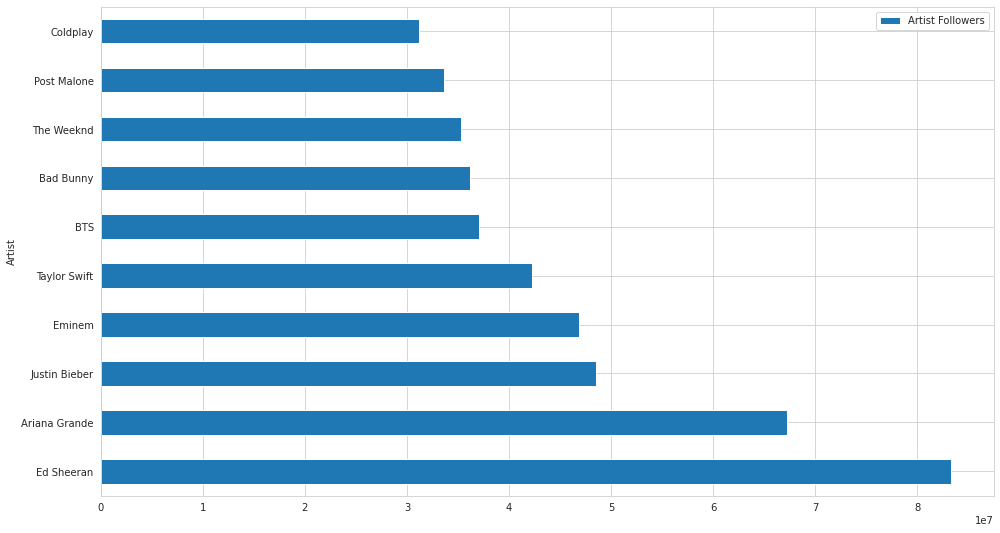

In [247]:
followsTable.head(10).plot.barh(figsize=(16, 9));

# Streaming z połaczeniem ile dni upłyneło od premiery

In [266]:
today = datetime.datetime.today().date()
today

datetime.date(2022, 1, 30)

In [302]:
data_temp_DF = data[data['Release Date'] >= '2020-01-01']

In [304]:
data_temp_DF['days'] = pd.to_datetime(today) - data_temp_DF['Release Date']
data_temp_DF['frequency'] = data_temp_DF['Streams']/data_temp_DF['days'].dt.days;

/tmp/ipykernel_5393/3863933354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp_DF['days'] = pd.to_datetime(today) - data_temp_DF['Release Date']
/tmp/ipykernel_5393/3863933354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp_DF['frequency'] = data_temp_DF['Streams']/data_temp_DF['days'].dt.days;


In [309]:
data_freq_DF = data_temp_DF[['Artist', 
                             'Song Name',
                             'Release Date',
                             'Streams',
                             'days',
                             'Popularity',
                             'frequency']].sort_values(by='frequency', ascending=False).reset_index(drop=True)

In [310]:
data_freq_DF.head(10)

,Artist,Song Name,Release Date,Streams,days,Popularity,frequency
0,The Kid LAROI,STAY (with Justin Bieber),2021-07-09,47248719,205 days,99,230481.556098
1,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),2021-07-23,33948454,191 days,96,177740.596859
2,Ed Sheeran,Bad Habits,2021-06-25,37799456,219 days,98,172600.255708
3,Olivia Rodrigo,good 4 u,2021-05-21,40162559,254 days,99,158120.311024
4,BTS,Permission to Dance,2021-07-09,22062812,205 days,95,107623.473171
5,Rauw Alejandro,Todo De Ti,2021-05-20,26951613,255 days,95,105692.600000
6,Bad Bunny,Yonaguni,2021-06-04,25030128,240 days,96,104292.200000
7,Doja Cat,Kiss Me More (feat. SZA),2021-04-09,29356736,296 days,94,99178.162162
8,Lil Nas X,MONTERO (Call Me By Your Name),2021-03-31,30071134,305 days,97,98593.881967
9,"J Balvin, Maria Becerra",Qué Más Pues?,2021-05-28,22405111,247 days,95,90708.951417


In [311]:
data_Pop_DF =  data_temp_DF[['Artist', 
                             'Song Name',
                             'Release Date',
                             'Streams',
                             'days',
                             'Popularity',
                             'frequency']].sort_values(by='Popularity', ascending=False).reset_index(drop=True)

In [312]:
data_Pop_DF.head(10)

,Artist,Song Name,Release Date,Streams,days,Popularity,frequency
0,The Kid LAROI,STAY (with Justin Bieber),2021-07-09,47248719,205 days,99,230481.556098
1,Olivia Rodrigo,good 4 u,2021-05-21,40162559,254 days,99,158120.311024
2,Ed Sheeran,Bad Habits,2021-06-25,37799456,219 days,98,172600.255708
3,Lil Nas X,MONTERO (Call Me By Your Name),2021-03-31,30071134,305 days,97,98593.881967
4,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),2021-07-23,33948454,191 days,96,177740.596859
5,Bad Bunny,Yonaguni,2021-06-04,25030128,240 days,96,104292.200000
6,BTS,Butter,2021-06-04,19985713,240 days,95,83273.804167
7,"J Balvin, Maria Becerra",Qué Más Pues?,2021-05-28,22405111,247 days,95,90708.951417
8,BTS,Permission to Dance,2021-07-09,22062812,205 days,95,107623.473171
9,Måneskin,I WANNA BE YOUR SLAVE,2021-03-19,24551591,317 days,95,77449.813880
